##Code to generate and save Gaussian test data for PULearning validation

In [70]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [71]:
# define constants

num_positive = 5000 #positive data
num_negative = 5000 # negative data
fractionOfPositives_labeled = 0.2 
fractionOfNegatives_labeled = 0.2 

#define Gaussians mean and covariance matrices

Gaussian1_mean = [0,0]
Gaussian2_mean = [1,1]

Gaussian1_cov = [[1, 0.5], [0.5, 1]]
Gaussian2_cov = [[1, -0.5], [-0.5, 1]]

#random generated data

positive_data = np.random.multivariate_normal(Gaussian1_mean,Gaussian1_cov,num_positive)
negative_data = np.random.multivariate_normal(Gaussian2_mean,Gaussian2_cov,num_negative)

positive_data_quadraticTerms = np.square(positive_data)
negative_data_quadraticTerms = np.square(negative_data)

positiveData_features = np.column_stack((positive_data, positive_data_quadraticTerms))
negativeData_features = np.column_stack((negative_data, negative_data_quadraticTerms))

In [72]:
features = np.vstack((positiveData_features,negativeData_features))
num_positive_labels = math.trunc(num_positive*fractionOfPositives_labeled)
num_negative_labels = math.trunc(num_negative*fractionOfNegatives_labeled)
label = [1]*num_positive_labels + [0]*(num_positive-num_positive_labels)+ [0]*(num_negative-num_negative_labels) + [-1]*num_negative_labels

In [73]:
data = np.column_stack((label, features))
np.random.shuffle(data)

In [74]:
df = pd.DataFrame(data, columns=['label','x','y', 'x**2', 'y**2'])

In [75]:
df.head(10)

,label,x,y,x**2,y**2
0,0,-1.276533,2.165835,1.629536,4.690839
1,0,2.082263,-0.314336,4.335819,0.098807
2,0,0.861785,-0.044228,0.742673,0.001956
3,0,-1.741614,-2.877375,3.033221,8.279286
4,0,0.862481,1.412573,0.743873,1.995363
5,0,0.867420,0.800850,0.752417,0.641361
6,0,1.569132,1.431788,2.462174,2.050017
7,-1,1.478557,1.255777,2.186131,1.576975
8,0,-0.652819,0.193020,0.426172,0.037257
9,0,1.631746,-0.597115,2.662595,0.356547


In [76]:
df.to_csv("../data/test_Gaussians_formatted.csv")

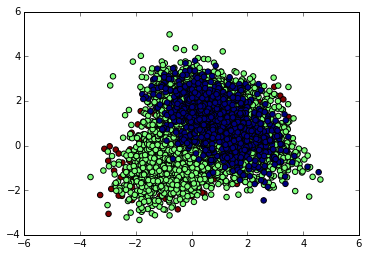

In [77]:
plt.figure()
plt.scatter(features[:, 0], features[:, 1], s=30, c=label)
plt.show()